<a href="https://colab.research.google.com/github/aswini-training/python/blob/main/Mini%20project%20HR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydantic-settings
!pip install pandas_profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a385146c6c0bf3288aa2ae820d34ffc8fb281de2e6a2ea80736744c13ebce548
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling sea

In [32]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/HR_comma_sep.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#Q1: How many employees in each of the department (use column "sales")
from tabulate import tabulate
num_employees_per_department = df['sales'].value_counts().reset_index()

# Rename columns to match output
num_employees_per_department.columns = ['sales', 'num_employees']
print(tabulate(num_employees_per_department,headers=['Sales','No.of employees'],tablefmt='grid'))

+----+-------------+-------------------+
|    | Sales       |   No.of employees |
+====+=============+===================+
|  0 | sales       |              4140 |
+----+-------------+-------------------+
|  1 | technical   |              2720 |
+----+-------------+-------------------+
|  2 | support     |              2229 |
+----+-------------+-------------------+
|  3 | IT          |              1227 |
+----+-------------+-------------------+
|  4 | product_mng |               902 |
+----+-------------+-------------------+
|  5 | marketing   |               858 |
+----+-------------+-------------------+
|  6 | RandD       |               787 |
+----+-------------+-------------------+
|  7 | accounting  |               767 |
+----+-------------+-------------------+
|  8 | hr          |               739 |
+----+-------------+-------------------+
|  9 | management  |               630 |
+----+-------------+-------------------+


In [ ]:
#Q2: Among employees who left, get the department wise (use column "sales"), number of employees and rank them.
#Output:sales,num_employees,rank
#conditionn: filtering df left column by number 1 which means left the company.
#method = dense is used in rank column to dense_rank leaves no gaps in ranking sequence when there are ties.

emp_left = df[df['left'] == 1].groupby('sales').size().reset_index(name='num_employees')
emp_left_sorted = emp_left.sort_values('num_employees', ascending=False)
# Adding a 'Rank' column based on sorted 'num_employees'
emp_left_sorted['Rank'] = emp_left_sorted['num_employees'].rank(ascending=False, method='dense').astype(int)
print(tabulate(emp_left_sorted, headers=['Sales', 'num_employees', 'Rank'], tablefmt='grid'))

+----+-------------+-----------------+--------+
|    | Sales       |   num_employees |   Rank |
+====+=============+=================+========+
|  7 | sales       |            1014 |      1 |
+----+-------------+-----------------+--------+
|  9 | technical   |             697 |      2 |
+----+-------------+-----------------+--------+
|  8 | support     |             555 |      3 |
+----+-------------+-----------------+--------+
|  0 | IT          |             273 |      4 |
+----+-------------+-----------------+--------+
|  3 | hr          |             215 |      5 |
+----+-------------+-----------------+--------+
|  2 | accounting  |             204 |      6 |
+----+-------------+-----------------+--------+
|  5 | marketing   |             203 |      7 |
+----+-------------+-----------------+--------+
|  6 | product_mng |             198 |      8 |
+----+-------------+-----------------+--------+
|  1 | RandD       |             121 |      9 |
+----+-------------+-----------------+--

In [ ]:
#Q3.Average number of years (time_spend_company) and average number of monthly hours (average_monthly_hours) for the employees left and not left under each department. Sort the value by sales.
#Output:left,sales,avg_time_spend_company,avg_average_monthly_hours
avg_hr = df.groupby(['left', 'sales']).agg(avg_time_spend_company=('time_spend_company', 'mean'),average_montly_hours=('average_montly_hours', 'mean')).reset_index()
avg_result = avg_hr.sort_values(by='sales')
print(tabulate(avg_hr,headers=['Left','Sales','avg_time_spend_company','average_montly_hours'],tablefmt='grid'))

+----+--------+-------------+--------------------------+------------------------+
|    |   Left | Sales       |   avg_time_spend_company |   average_montly_hours |
+====+========+=============+==========================+========================+
|  0 |      0 | IT          |                  3.35639 |                198.887 |
+----+--------+-------------+--------------------------+------------------------+
|  1 |      0 | RandD       |                  3.25225 |                198.952 |
+----+--------+-------------+--------------------------+------------------------+
|  2 |      0 | accounting  |                  3.42451 |                199.037 |
+----+--------+-------------+--------------------------+------------------------+
|  3 |      0 | hr          |                  3.19275 |                199.25  |
+----+--------+-------------+--------------------------+------------------------+
|  4 |      0 | management  |                  4.39518 |                200.234 |
+----+--------+-

In [36]:
#Q4:Under each department, what is the minimum and maximum for both left and not left employees related to time_spend_company and average_monthly_hours. Sort the value by sales.
#Output:left,sales,min_time_spend_company,max_time_spend_company,min_average_monthly_hours,max_average_monthly_hours
result = df.groupby(by=['left','sales']).agg({"average_montly_hours":['min','max'],"time_spend_company": ['min','max',]}).reset_index()
print(tabulate(result,headers=['Left','Sales','Min_Avg Monthly Hrs','Max_Avg Monthly Hrs','Min_Time Spend','Max_Time Spend'],tablefmt='grid'))


+----+--------+-------------+-----------------------+-----------------------+------------------+------------------+
|    |   Left | Sales       |   Min_Avg Monthly Hrs |   Max_Avg Monthly Hrs |   Min_Time Spend |   Max_Time Spend |
+====+========+=============+=======================+=======================+==================+==================+
|  0 |      0 | IT          |                    96 |                   287 |                2 |               10 |
+----+--------+-------------+-----------------------+-----------------------+------------------+------------------+
|  1 |      0 | RandD       |                    98 |                   287 |                2 |                8 |
+----+--------+-------------+-----------------------+-----------------------+------------------+------------------+
|  2 |      0 | accounting  |                    97 |                   285 |                2 |               10 |
+----+--------+-------------+-----------------------+-------------------

In [ ]:
#Q5:Under each department, what is the minimum, maximum, average on last evaluation (last_evaluation) and satisfaction level (satisfaction_level) for both left and not left. Sort the value by sales.
#Output:left,sales,min_last_evaluation,max_last_evaluation,avg_last_evaluation, min_satisfaction_level, max_satisfaction_level,avg_satisfaction_level

result_cal = df.groupby(by=['left','sales']).agg({"last_evaluation":['min','max','mean'],"satisfaction_level":['min','max','mean']}).reset_index()
print(tabulate(result_cal,headers=['Left','Sales','Min_Last Evaluation','Max_Last Evaluation','Avg_Last Evaluation','Min_Satisfaction Level','Max_Satisfaction Level','Avg_Satisfaction Level'],tablefmt='grid'))


+----+--------+-------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|    |   Left | Sales       |   Min_Last Evaluation |   Max_Last Evaluation |   Avg_Last Evaluation |   Min_Satisfaction Level |   Max_Satisfaction Level |   Avg_Satisfaction Level |
+====+========+=============+=======================+=======================+=======================+==========================+==========================+==========================+
|  0 |      0 | IT          |                  0.37 |                     1 |              0.71305  |                     0.12 |                     1    |                 0.67717  |
+----+--------+-------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|  1 |      0 | RandD       |                  0.36 |                     1 |        

In [ ]:
#Q6:Under each department, what is the total count (sum) on work accidents (work_accident) and promotion for the last 5 years (promotion_last_5years) for both left and not left. Sort the value by sales.
#Output:left,sales,count_work_accident,count_promotion_last_5years
count_df=df.groupby(['left','sales']).agg({'Work_accident':'sum','promotion_last_5years':'sum'}).reset_index()
print(tabulate(count_df,headers=['Left','Sales','Count_Work Accident','Count_Promotion Last 5 Yrs'],tablefmt='grid'))


+----+--------+-------------+-----------------------+------------------------------+
|    |   Left | Sales       |   Count_Work Accident |   Count_Promotion Last 5 Yrs |
+====+========+=============+=======================+==============================+
|  0 |      0 | IT          |                   155 |                            0 |
+----+--------+-------------+-----------------------+------------------------------+
|  1 |      0 | RandD       |                   124 |                           27 |
+----+--------+-------------+-----------------------+------------------------------+
|  2 |      0 | accounting  |                    87 |                           14 |
+----+--------+-------------+-----------------------+------------------------------+
|  3 |      0 | hr          |                    82 |                           15 |
+----+--------+-------------+-----------------------+------------------------------+
|  4 |      0 | management  |                    98 |            

In [ ]:
#Bring the output from question 3-6 above.
#Output:left,sales,avg_time_spend_company,avg_average_monthly_hours,min_time_spend_company,max_time_spend_company,min_average_monthly_hours,max_average_monthly_hours,min_last_evaluation,max_last_evaluation,avg_last_evaluation,min_satisfaction_level, max_satisfaction_level,avg_satisfaction_level,count_work_accident,count_promotion_last_5years

combine=df.groupby(by=['left','sales']).aggregate({"average_montly_hours":['mean','min','max'],"time_spend_company":['mean','min','max'],\
                                                   "last_evaluation":['mean','min','max'],"satisfaction_level":['mean','min','max'],\
                                                   'Work_accident':'sum','promotion_last_5years':'sum'}).reset_index()

print(tabulate(combine,headers=['Left','Sales','Avg_Monthly Hrs','Min_Avg Monthly Hrs','Max_Avg Monthly Hrs',\
'Avg_Time Spend','Min_Time Spend','Max_Time Spend',\
'Avg_Last Evaluation','Min_Last Evaluation','Max_Last Evaluation',\
     'Avg_Satisfaction Level','Min_Satisfaction Level','Max_Satisfaction Level',\
     'Count_Work Accident','Count_Promotion Last 5 Yrs'], tablefmt='grid'))


+----+--------+-------------+-------------------+-----------------------+-----------------------+------------------+------------------+------------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+-----------------------+------------------------------+
|    |   Left | Sales       |   Avg_Monthly Hrs |   Min_Avg Monthly Hrs |   Max_Avg Monthly Hrs |   Avg_Time Spend |   Min_Time Spend |   Max_Time Spend |   Avg_Last Evaluation |   Min_Last Evaluation |   Max_Last Evaluation |   Avg_Satisfaction Level |   Min_Satisfaction Level |   Max_Satisfaction Level |   Count_Work Accident |   Count_Promotion Last 5 Yrs |
+====+========+=============+===================+=======================+=======================+==================+==================+==================+=======================+=======================+=======================+==========================+=====================

In [41]:
df_combine = avg_hr.merge(result,on=['left','sales'],how='inner')
df2=df_combine.merge(result_cal,on=['left','sales'],how='inner')
df3=df2.merge(count_df,on=['left','sales'],how='inner')
print(df3.head(10))

   left        sales  avg_time_spend_company  average_montly_hours  \
0     0           IT                3.356394            198.886792   
1     0        RandD                3.252252            198.951952   
2     0   accounting                3.424512            199.037300   
3     0           hr                3.192748            199.250000   
4     0   management                4.395176            200.233766   
5     0    marketing                3.480916            198.888550   
6     0  product_mng                3.330966            197.765625   
7     0        sales                3.443698            199.571657   
8     0      support                3.213859            199.140980   
9     0    technical                3.222442            198.471083   

   (average_montly_hours, min)  (average_montly_hours, max)  \
0                           96                          287   
1                           98                          287   
2                           97          

<ipython-input-41-a3308821be6d>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df_combine = avg_hr.merge(result,on=['left','sales'],how='inner')
<ipython-input-41-a3308821be6d>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_combine = avg_hr.merge(result,on=['left','sales'],how='inner')
<ipython-input-41-a3308821be6d>:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df2=df_combine.merge(result_cal,on=['left','sales'],how='inner')
<ipython-input-41-a3308821be6d>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df2=df_combine.merge(result_cal,on=['left','sales'],how='inner')


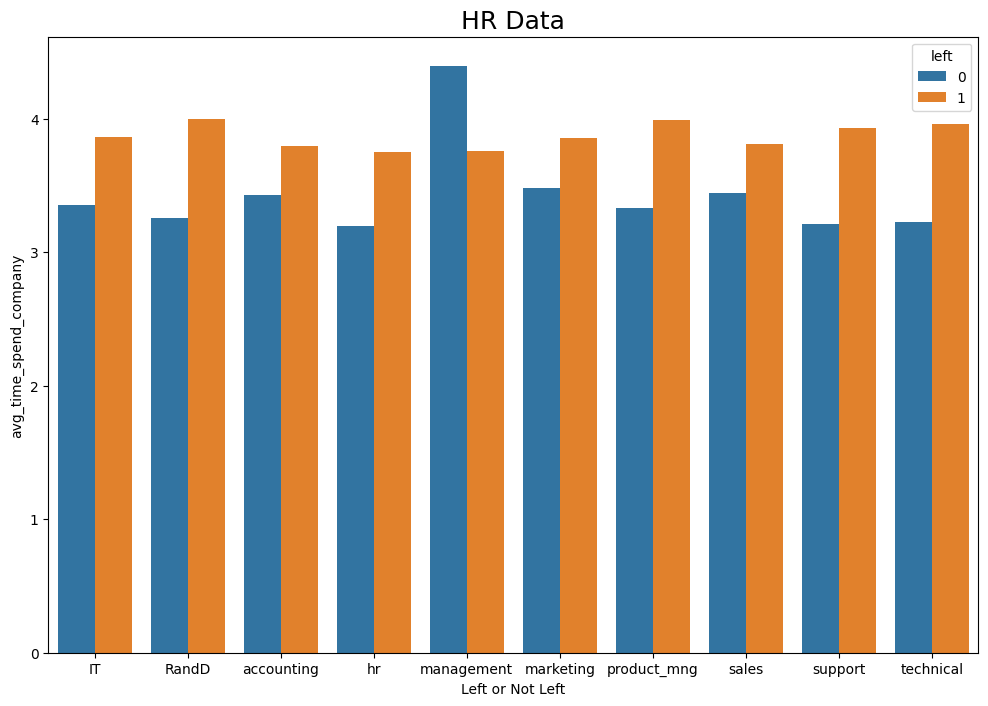

In [59]:
#Q8:Using output from the question 7 above, plot them as a grouped bar chart (similar to this or see group bar chart below) with seaborn. There must be two bars, one bar representing left and another for not left. This plot is for each unique department values in column “sales.”

#X-axis => left or not left
#Y-axis => avg_time_spend_company (for each unique department values in column "sales"). This is the average calculated from "time_spend_company"
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.barplot(x="sales", y="avg_time_spend_company", hue="left", data=df3)
plt.xlabel("Left or Not Left")
plt.ylabel("avg_time_spend_company")
plt.title("HR Data", size=18)
plt.show()


<ipython-input-85-2a89cd4d5d1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(avg_hr.corr(), cmap='Blues', annot=True)


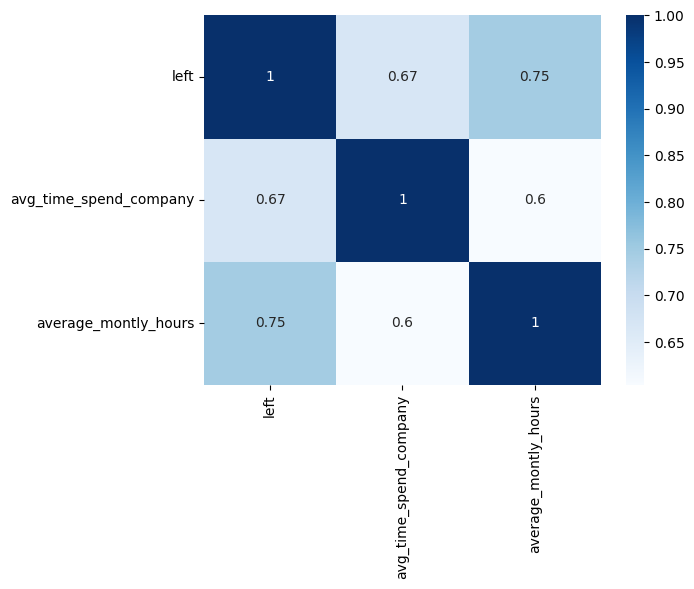

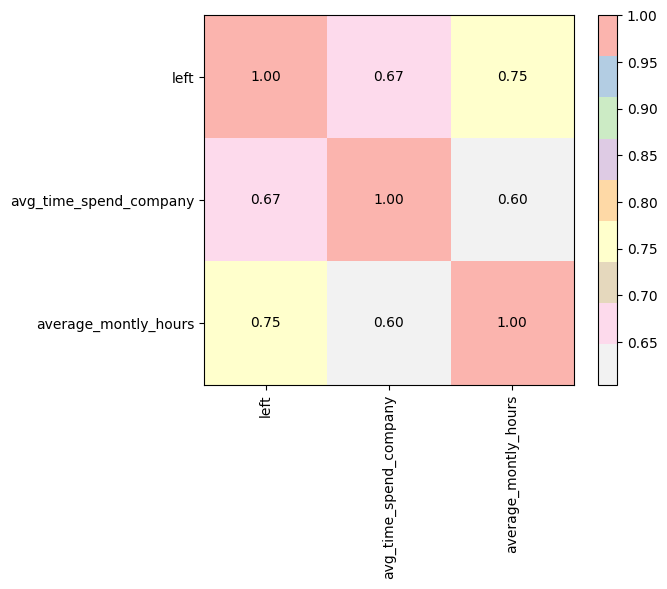

In [85]:
#Q9:For output of 3, plot heat map as shown in the image following with the numbers. One approach is to use seaborn.
sns.heatmap(avg_hr.corr(), cmap='Blues', annot=True)
plt.show()

#range(len(corr)) for rows and range(len(corr.columns)
#fig, ax = plt.subplots(): makes it easier to later expand or modify your plot, add more subplots, or adjust the layout.


avg_hr_modified = avg_hr.drop('sales', axis=1)
fig, ax = plt.subplots()
corr = avg_hr_modified.corr()
cax = ax.imshow(corr, cmap='Pastel1_r')
fig.colorbar(cax) #Adding color bar

# Setting ticks
plt.xticks(ticks=range(len(avg_hr_modified.columns)), labels=avg_hr_modified.columns, rotation=90)
plt.yticks(range(len(avg_hr_modified.columns)), labels=avg_hr_modified.columns)

# Annotating each cell with the numeric value
for i in range(len(corr)):#rows
    for j in range(len(corr.columns)):#for columns
        ax.text(j, i, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()